# 19 In-Class Assignment: Least Squares Fit (LSF)

<img alt="image showing a 3D vector projected onto a 2D plane" src="https://lh5.googleusercontent.com/RFgtgkULxOPzUC8lwl1j265FjpzaD2YIDHjy94VyqOOU7xIQf03bsHDSmxYNOmYDXeLPn7iMTg=w740" width="50%">
</p>


### Agenda for today's class (80 minutes)



1. [(20 minutes) LSF Pre-class Review](#Pre-class_Review)
1. [(30 minutes) Finding the best solution in an overdetermined system](#Finding_the_best_solution_in_an_overdetermined_system)
1. [(30 minutes) Pseudoinverse](#Pseudoinverse)

---
<a name="Pre-class_Review"></a>

## 1. LSF Pre-class Review

* [19--LSF_pre-class-assignment.ipynb](19--LSF_pre-class-assignment.ipynb)

----
<a name="Finding_the_best_solution_in_an_overdetermined_system"></a>
## 2. Finding the best solution in an overdetermined system

Let $Ax = y$ be a system of $m$ linear equations in $n$ variables. A *least squares solution* of $Ax = y$ is an solution $\hat{x}$ in $R^n$ such that:

$$ \min_{\hat{x}}\|y - A\hat{x}\|.$$

Note we substitute $y$ for our typical variable $b$ here because we will use $b$ later to represent the intercept to a line and we want to try and avoid confusion in notation. It also consistent with the picture above. 

In other words, $\hat{x}$ is a value of $x$ for which $Ax$ is as close as possible to $y$. From previous lectures, we know this to be true if the vector $$y - A\hat{x}$$ is orthogonal (perpendicular) to the column space of $A$.

We also know that the dot product is zero if two vectors are orthogonal. So we have  
$$a \cdot (Ax - y)  = 0, $$
for all vectors $a$ in the column spaces of $A$.

The columns of $A$ span the column space of $A$. Denote the columns of $A$ as 
$$A = [a_1, \cdots, a_n].$$ 
Then we have 
$$a_1^\top (Ax - y)  = 0, \\ a_2^\top(Ax-y)=0\\\vdots \\a_n^\top(Ax-y)=0.$$
It is the same as taking the transpose of $A$ and doing a matrix multiply:
$$A^\top (Ax - y) = 0.$$

That is:

<font size=40>$$A^\top Ax = A^\top y$$</font>

The above equation is called the *least squares solution* to the original equation $Ax=y$.  The matrix $A^\top A$ is symmetric and invertable. Then solving for $\hat{x}$ can be calculated as follows:

$$x = (A^\top A)^{-1}A^\top y$$


The matrix $(A^\top A)^{-1}A^\top$ is also called the left inverse.

**Example:** A researcher has conducted experiments of a particular Hormone dosage in a population of rats. The table shows the number of fatalities at each dosage level tested. Determine the least squares line and use it to predict the number of rat fatalities at hormone dosage of 22. 

| Hormone level  | 20 | 25 | 30 | 35 | 40 | 45 | 50  |
|---|---|---|---|---|---|---|---|
| Fatalities | 101 | 115 | 92 | 64 | 60 | 50 | 49| 


In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import time
from answercheck import checkanswer
sym.init_printing(use_unicode=True)

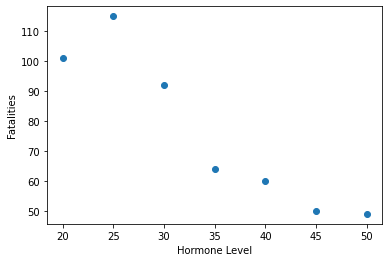

In [2]:
H = [20,25,30,35,40,45,50]
f = [101,115, 92,64,60,50,49]

plt.scatter(H,f)
plt.xlabel('Hormone Level')
plt.ylabel('Fatalities')
f = np.matrix(f).T

We want to determine a line that is expressed by the following equation 

$$f = aH + b,$$

to approximate the connection between Hormone dosage ($H$) and Fatalities $f$. 
That is, we want to find $a$ (slope) and $b$ (y-intercept) for this line. First we define the variable $ 
x = \left[
\begin{matrix}
    a  \\
    b  
\end{matrix}
\right] 
$ as the column vector that needs to be solved.

<mark>&#9989;**<font color=red>DO THIS:</font>** Rewrite the system of equations to the form $Ax=y$ by defining your ```numpy``` matrices ```A``` and ```y``` using the data from above:</mark>

In [3]:
#put your code here
A = np.matrix([[20,1],[25,1],[30,1],[35,1],[40,1],[45,1],[50,1]])
y = np.matrix(f)

In [4]:
checkanswer.matrix(A,'1ba0e00db420001b8418cc71936be2ad');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[20.  1.]
 [25.  1.]
 [30.  1.]
 [35.  1.]
 [40.  1.]
 [45.  1.]
 [50.  1.]]
Answer seems to be correct



In [5]:
checkanswer.matrix(y, '37e2ed57a1516fb4a17eb2a3e9e99d2d');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[101.]
 [115.]
 [ 92.]
 [ 64.]
 [ 60.]
 [ 50.]
 [ 49.]]
Answer seems to be correct



<mark>&#9989; **<font color=red>QUESTION:</font>** Calculate the square matrix $C = A^\top A$ and the modified right hand side vector as $A^\top y$ (Call it ```Aty```):</mark>

In [6]:
#Put your code here
At = A.T
C = At * A
Aty = At * y

In [7]:
checkanswer.matrix(C,'8662ea979b04d6e2123092be4e69dcc2');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[9.275e+03 2.450e+02]
 [2.450e+02 7.000e+00]]
Answer seems to be correct



In [8]:
checkanswer.matrix(Aty,'185258f9fd7e1a732157dcb71ccf5d3a');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[16995.]
 [  531.]]
Answer seems to be correct



<mark>&#9989;**<font color=red>QUESTION:</font>** Find the *least squares solution* by solving $Cx=A^\top y$ for $x$.</mark>

In [9]:
# Put your code here
x = np.linalg.inv(C) * At * y

In [10]:
checkanswer.matrix(x,'d053e7b0a4863f4381079bac25133635');

Testing [[ -2.27143]
 [155.35714]]
Answer seems to be correct



<mark>&#9989;**<font color=red>QUESTION:</font>** Given the solution above, define the two scalars slope ```a``` and y-intercept ```b```.</mark>

In [11]:
#put your code here
a = float(x[0][0])
b = float(x[1][0])

In [12]:
checkanswer.float(a,'f7dfa5a5ed0f65f0e0a87f29efd9cd74');

Testing -2.27143
Answer seems to be correct



In [13]:
checkanswer.float(b,'87e53cb122536f53f434cdbccf0aca94');

Testing 155.35714
Answer seems to be correct



The following code will Plot the original data and the line estimated by the coefficients found in the above quation.

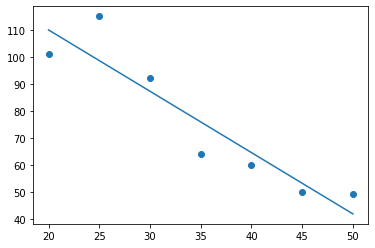

In [14]:
H = [20,25,30,35,40,45,50]
f = [101,115, 92,64,60,50,49]
plt.scatter(H,f)

H2 = np.linspace(np.min(H), np.max(H))

f2 = a * H2 + b

plt.plot(H2, f2)


<mark>&#9989;**<font color=red>QUESTION:</font>**  Repeat the above analysis but now with a eight-order polynomial.</mark>

In [45]:
#Put your code here
H = [20,25,30,35,40,45,50]
f = [101,115, 92,64,60,50,49]
plt.scatter(H,f)

H2 = np.linspace(np.min(H), np.max(H))

f2 = a * H2 + b

plt.plot(H2, f2)

<div style='background-color:lightgrey; padding-bottom:12px;'>
**Hint** your code should generate a graph that looks like:

![Image of eight-order polynomial fitting to the data](https://i.imgur.com/GHGaJ2r.png)
</div>

<mark>&#9989;**<font color=red>QUESTION:</font>**  Play with the interactive function below by adjusting the degree of the least-squares fit approximation. Then extend the `x_min` and `x_max` parameters. Do you think that an eight-order polynomial is a good model for this dataset? Why or why not?</mark>

In [47]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

@interact(x=fixed(H), y=fixed(f), degree=widgets.IntSlider(min=1, max=8, step=1, value=8), x_min=widgets.IntSlider(min=min(H)-10, max=min(H), step=1, value=min(H)), x_max=widgets.IntSlider(min=max(H), max=max(H)+10, step=1, value=max(H)))
def graphPolyN(x, y, x_min, x_max, degree):
    p = np.polyfit(x, y, degree)
    f = np.poly1d(p)
    
    x_pred = np.linspace(x_min, x_max, 1000)
    y_pred = f(x_pred)
    
    plt.scatter(x, y, color="red")
    plt.plot(x_pred, y_pred)
    

interactive(children=(IntSlider(value=20, description='x_min', max=20, min=10), IntSlider(value=50, descriptio…

It will be good becuase it will the best regression.

<mark>&#9989;**<font color=red>QUESTION:</font>**  Check the rank of $C=A^\top A$ for the previous case. What do you get? Why?</mark>

In [48]:
np.linalg.matrix_rank(C)

2

We get a rank of 2 that means that it is linearly independent.

----
<a name="Pseudoinverse"></a>
## 3. Pseudoinverse

In this class we often talk about solving problems of the form:

$$Ax = b$$

Currently we have determined that this problem becomes very nice when the $n \times n$ matrix $A$ has an inverse. We can easily multiply each side by the inverse:

$$A^{-1}Ax = A^{-1}b$$

Since $A^{-1}A = I$ the solution for $x$ is simply:

$$x = A^{-1}b$$

Now, let us consider a a more general problem where the $m \times n$ matrix $A$ is not square, i.e. $m \neq n$ and its rank $r$ maybe less than $m$ and/or $n$.  In this case we want to find a Pseudoinverse (which we denote as $A^+$) which acts like an inverse for a non-square matrix. In other words we want to find an $A^+$ for $A$ such that:

$$A^+A \approx I$$

Assuming we can find the $n \times m$ matrix $A^+$, we should then be able to solve for $x$ as follows:

$$Ax = b$$
$$A^+Ax = A^+b$$
$$x \approx A^+b$$

### How do we know there is a Psudoinverse
Assuming the general case of a $m\times n$ matrix $A$ where its rank $r$ maybe less than $m$ and/or $n$ ($r\leq m$ and $r\leq n$). We can conclude the following about the fundamental spaces of $A$:
- The rowspace of $A$ is in $R^n$ with dimension $r$ 
- The columnspace of $A$ is in $R^m$ also with dimension $r$.
- The nullspace of $A$ is in $R^n$ with dimension $n-r$
- The nullspace of $A^T$ is in $R^m$ with dimension $m-r$.

Because the rowspace of $A$ and the column space $A$ have the same dimension then $A$ is a the one-to-one mapping from the row space to the columnspace. In other words:
- For any $x$ in the rowspace, we have that $Ax$ is one point in the columnspace. If $x'$ is another point in the row space different from $x$, we have $Ax\neq Ax'$ (The mapping is one-to-one). 
- For any $y$ in the columnspace, we can find $x$ in the rowspace such that $Ax=y$ (The mapping is onto). 

The above is not really a proof but hopefully there is sufficient information to convince yourself that this is true. 

### How to compute pseudoinverse
We want to find the $n\times m$ matrix that maps from columnspace to the rowspace of $A$, and $x=A^+Ax,$ if $x$ is in the rowspace. 

+ Let's apply SVD on $A$: $$A= U\Sigma V^\top,$$
where $U$ is a $m\times m$ matrix, $V^\top$ is a $n\times n$ matrix, and $\Sigma$ is a diagonal $m\times n$ matrix. 
We can decompose the matrices as 
$$A = \begin{bmatrix}\vdots & \vdots \\ U_1 & U_2 \\ \vdots &\vdots\end{bmatrix} \begin{bmatrix}\Sigma_1 & 0 \\ 0 & 0\end{bmatrix}  \begin{bmatrix}\cdots & V_1^\top & \cdots \\ \cdots & V_2^\top &\cdots \end{bmatrix}.$$
Here $U_1$ is of $m\times r$, $U_2$ is of $m\times (m-r)$, $\Sigma_1$ is of $r\times r$, $V_1^\top$ is of $r\times n$, and $V_2^\top$ is of $(n-r)\times n$. 
    + The columnspace of $U_1$ is the columnspace of $A$, and columnspace of $U_2$ is the nullspace of $A^\top$. 
    + The rowspace of $V_1$ is the rowspace of $A$, and rowspae of $V_2$ is the nullspace of $A$.

+ If $x$ is in the rowspace of $A$, we have that $V_2^\top x=0$. We have $Ax = U_1\Sigma_1 V_1^\top x$.
    + If we define a matrix $B=V_1\Sigma_1^{-1}U_1^\top$, we have that $BAx=V_1\Sigma_1^{-1}U_1^\top U_1\Sigma_1 V_1^\top x=V_1V_1^\top x$. That is $BAx=x$ is $x$ is in the rowspace of $A$. 
    
+ The matrix $B$ is the pseudoinverse of matrix $A$. 
$$A^+ = V_1\Sigma_1^{-1}U_1^\top$$
$$A^+ = \begin{bmatrix}\vdots & \vdots \\ V_1 & V_2 \\ \vdots &\vdots\end{bmatrix} \begin{bmatrix}\Sigma_1^{-1} & 0 \\ 0 & 0\end{bmatrix}  \begin{bmatrix}\cdots & U_1^\top & \cdots \\ \cdots & U_2^\top &\cdots \end{bmatrix}.$$

**Example 1:** Let $$A=[1,2]$$
we know that 
$r=m=1$ and $n=2$.

In [15]:
A = np.matrix([[1,2]])

<mark>&#9989;**<font color=red>TODO:</font>**  Calculate the pseudoinverse $A^+$ of $A$ using the ```numpy.linalg``` function ```pinv```:</mark>

In [16]:
#put your code here
pInv_A = np.linalg.pinv(A)

In [17]:
checkanswer.matrix(pInv_A,'d69023de71a667d14b808efeb38f0839');

Testing [[0.2]
 [0.4]]
Answer seems to be correct



<mark>&#9989;**<font color=red>DO THIS:</font>**  Compute $AA^+$ and $A^+A$</mark>

In [18]:
#put your code here
sym.Matrix(A*pInv_A)

[1.0]

In [19]:
sym.Matrix(pInv_A*A)

⎡0.2  0.4⎤
⎢        ⎥
⎣0.4  0.8⎦

<mark>&#9989;**<font color=red>QUESTION:</font>** If $x$ is in the nullspace of $A$ what is the effect of $A^+Ax$?</mark>

In [20]:
x = sym.Matrix(A).nullspace()
x

⎡⎡-2⎤⎤
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦

In [21]:
print(pInv_A*A*1)
print(pInv_A*A*(-2))

[[0.2 0.4]
 [0.4 0.8]]
[[-0.4 -0.8]
 [-0.8 -1.6]]


It will just be $A^+Ax$ multiplied by $x$.

<mark>&#9989;**<font color=red>QUESTION:</font>**  If $x$ is in the rowspace of $A$ what is the effect of $A^+Ax$?</mark>

In [73]:
rref = sym.Matrix(A).rref()[0]
rref

[1  2]

It will be just $x$ multiplied with $A^+Ax$.

### Left inverse is pseudoinverse

We can compute the left inverse of $A$ if $r=n\leq m$. In this case, we may have more rows than columns, and the matrix $A$ has full column rank. 

In this case, the SVD of $A$ is 
$$A = U\Sigma V^\top   .$$
Here $U$ is of $m\times n$, $\Sigma$ is of $n\times n$ and nonsingular, $V^\top$ is of $n\times n$. 
The pseudoinverse of $A$ is $$A^+ = V\Sigma^{-1}U^\top$$

The left inverse of $A$ is 
$$(A^\top A)^{-1}A^\top= (V\Sigma U^\top U\Sigma V^\top  )^{-1} V\Sigma U^\top = V(\Sigma \Sigma )^{-1} V^\top V\Sigma U^\top =  V\Sigma ^{-1} U^\top =A^+$$

**Example 2:** Let $$A=\begin{bmatrix}1\\2\end{bmatrix}$$
we know that 
$r=n=1$ and $m=2$. Then we have the left inverse.

In [22]:
A = np.matrix([[1],[2]])
A

matrix([[1],
        [2]])

<mark>&#9989;**<font color=red>DO THIS:</font>** Calculate the pseudoinverse $A^+$ of $A$.</mark>

In [23]:
#Put your answer here
pInv_A = np.linalg.pinv(A)

In [24]:
checkanswer.matrix(pInv_A,'b859ed0005ca3024f6a58f78ecfbd1a6');

Testing [[0.2 0.4]]
Answer seems to be correct



<mark>&#9989;**<font color=red>DO THIS:</font>**  Calculate the left inverse of $A$, and verify that it is the same as $A^+$.</mark>

In [25]:
#Put your anaswer here
leftInv_A = np.linalg.inv(A.T*A) * A.T

In [26]:
checkanswer.matrix(leftInv_A,'b859ed0005ca3024f6a58f78ecfbd1a6');

Testing [[0.2 0.4]]
Answer seems to be correct



----

Written by Dr. Dirk Colbry with interactive code David Yonkers, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.